# EigenFace

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import pandas as pd
import os
import random

In [2]:
dataset_train_list=os.listdir('datasets_train/')
dataset_test_list=os.listdir('datasets_test/')

width=195
height=231

In [3]:
train_shaped_array=np.ndarray(shape=(len(dataset_train_list),height*width),dtype=np.float64)
train_shaped_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### hear we get all Train Datasets and we want to reshape them to 1 x (height*width) for each intances 

## Show Training Image
#### Now we want to store the train_shape_array and show them

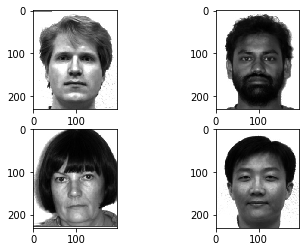

In [4]:
for i in range(len(dataset_train_list)):
    img=mpimage.imread('datasets_train/'+dataset_train_list[i])
    train_shaped_array[i,:]=np.array(img,dtype='float64').flatten()
    plt.subplot(2,2,1+i)
    plt.imshow(img,cmap='gray')
plt.show()

In [5]:
test_shaped_array=np.ndarray(shape=(len(dataset_test_list),height*width),dtype=np.float64)
test_shaped_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

build an 1 x (hight*width) for each image instances
# show Test Images

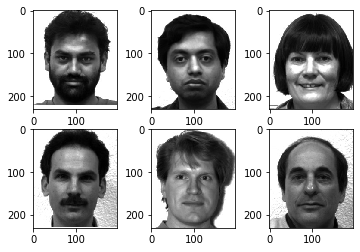

In [6]:
for i in range(len(dataset_test_list)):
    img=mpimage.imread('datasets_test/'+dataset_test_list[i])
    test_shaped_array[i,:]=np.array(img,dtype='float64').flatten()
    plt.subplot(2,3,1+i)
    plt.imshow(img,cmap='gray')
plt.show()

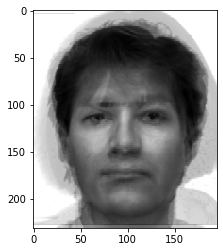

In [7]:
mean_face=np.zeros((1,height*width),dtype=np.float64)

for i in train_shaped_array:
    mean_face=np.add(mean_face,i)#adding each element of the pictures

mean_face=np.divide(mean_face,float(len(dataset_train_list))).flatten()# divided each element to number of the datasets
plt.imshow(mean_face.reshape(height,width),cmap='gray')
plt.show()

## Normalize Training Images  

In [8]:
normal_train_array=np.ndarray(shape=(len(dataset_train_list),height*width))

for i in range(len(dataset_train_list)):
    normal_train_array[i]=np.subtract(train_shaped_array[i],mean_face)

## showing Normalized Image 

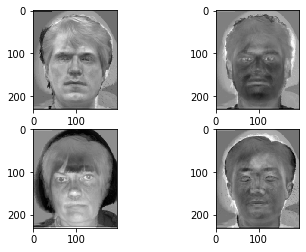

In [9]:
for i in range(len(dataset_train_list)):
    img=normal_train_array[i].reshape(height,width)
    plt.subplot(2,2,1+i)
    plt.imshow(img,cmap='gray')
plt.show()
    

In [10]:
cov_matrix=np.cov(normal_train_array)
cov_matrix=np.divide(cov_matrix,len(dataset_train_list))

In [11]:
eigenvalues,eigenvectors,=np.linalg.eig(cov_matrix)

In [12]:
eigenvalues

array([ 1.71206550e+03, -1.64217075e-12,  5.06049984e+02,  2.72642428e+02])

In [13]:
eigenvectors

array([[-0.06256304,  0.5       ,  0.783643  , -0.36330361],
       [-0.47556953,  0.5       , -0.56607415, -0.45099187],
       [ 0.82813969,  0.5       , -0.25334513, -0.00094431],
       [-0.29000712,  0.5       ,  0.03577628,  0.8152398 ]])

In [21]:
eigen_pairs=[(eigenvalues[i],eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigenvalues_sort  = [eigen_pairs[index][0] for index in range(len(eigenvalues))]
eigenvectors_sort = [eigen_pairs[index][1] for index in range(len(eigenvalues))]
print(eigenvectors[:7])

[[-0.06256304  0.5         0.783643   -0.36330361]
 [-0.47556953  0.5        -0.56607415 -0.45099187]
 [ 0.82813969  0.5        -0.25334513 -0.00094431]
 [-0.29000712  0.5         0.03577628  0.8152398 ]]


In [15]:
reduced_vector=np.array(eigenvectors[:7]).transpose()
multi=np.dot(train_shaped_array.transpose(),reduced_vector)
multi=multi.transpose()

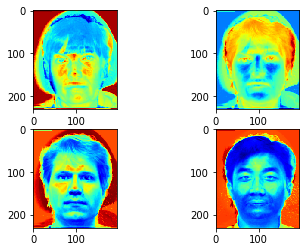

In [16]:
for i in range(multi.shape[0]):
    img=multi[i].reshape(height,width)
    plt.subplot(2,2,i+1)
    plt.imshow(img,cmap='jet')
plt.show()


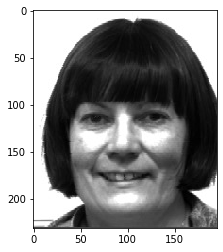

In [17]:
rand_index=random.randint(0,len(dataset_test_list)-1)
test_image=mpimage.imread('datasets_test/'+dataset_test_list[rand_index])
test_image_vector=np.array(test_image,dtype=np.float64).flatten()

plt.imshow(test_image,cmap='gray')
plt.show()

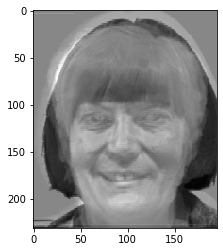

In [18]:
normalized_test_image=np.subtract(test_image_vector,mean_face)
plt.imshow(normalized_test_image.reshape(height,width),cmap='gray')
plt.show()